<center><h1> Act Report </h1></center>

<img src="img/weratedogs.png" alt="Drawing" style="width: 800px;"/>


### Insights:

* La Moyenne générale des notes est de *11* tandis que les Moyennes des notes > 10 et < 10 sont respectivement *12.0* et *7.0*.
* *2017* est l'année qui a obtenu le plus grande moyenne, avec une tendance croissante au fil du temps.

<AxesSubplot: xlabel='rating_numerator', ylabel='Count'>

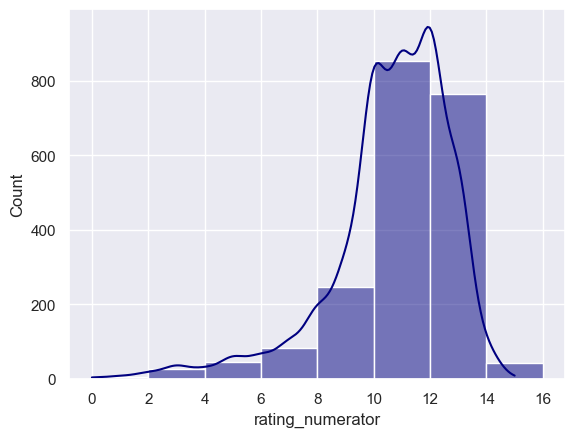

In [684]:
# Aperçu de l'histograme de notes
sns.set(style="darkgrid")
sns.histplot(data=all_data.rating_numerator,color='navy', binwidth = 2, kde=True)

In [685]:
# Regroupement par année
group_an = all_data.groupby(all_data.date.dt.year)

In [686]:
# Note moyenne générale
print("Moyenne générale des notes : ",np.round(all_data.rating_numerator.mean(), 0).astype(int))
# plus grand que 10
print("Moyenne des notes > 10 : ", np.round(all_data[all_data.rating_numerator > 10].rating_numerator.mean(), 0))
# plus petit que 10
print("Moyenne des notes < 10 : ", np.round(all_data[all_data.rating_numerator < 10].rating_numerator.mean(), 0))

Moyenne générale des notes :  11
Moyenne des notes > 10 :  12.0
Moyenne des notes < 10 :  7.0


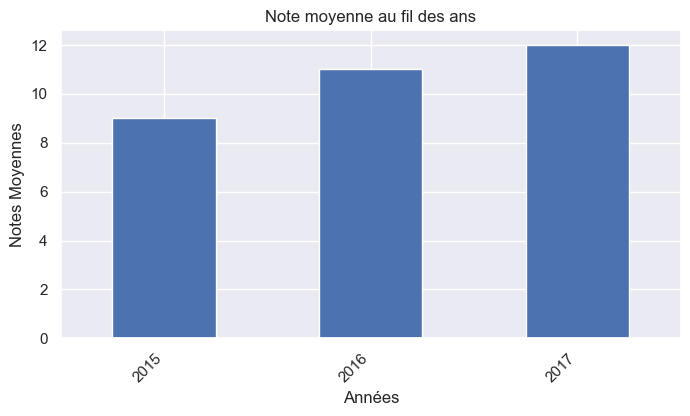

In [687]:
# Note à l'année
notes_an = np.round(group_an.rating_numerator.mean()).astype(int)

plt.figure(figsize=(8, 4))
notes_an.plot(kind='bar')
plt.title("Note moyenne au fil des ans")
plt.xlabel("Années")
plt.ylabel("Notes Moyennes")
plt.xticks(rotation=45, horizontalalignment='right');

* *98.0 %* des tweets sont postés à partir de l'application Tweeter pour *Iphone*,cela est dû au fait que les tweets eux-même proviennent du compte @WeRateDodgs. Donc le seul utilisateur de ce compte préfère utiliser l'appli sur son iphone pour poster ses tweets.

Text(0, 0.5, '  ')

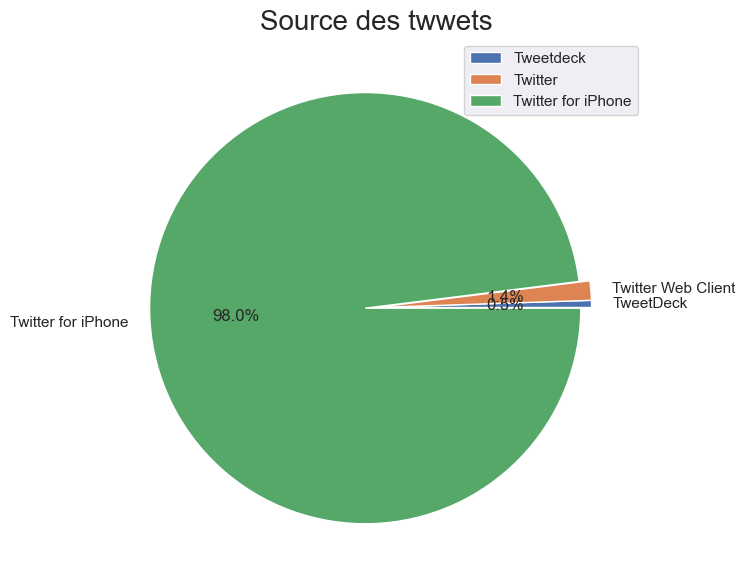

In [688]:
tweet_sources = all_data.groupby('source').count()[['tweet_id']]
tweet_sources.rename(columns={'tweet_id': 'source_count'}, inplace=True)
tweet_sources['source_percentage'] = tweet_sources.source_count / tweet_sources.source_count.sum() * 100
tweet_sources['source_percentage'].plot.pie(figsize=(7,7), autopct='%1.1f%%',
        explode=(0,0,0.05))
plt.title("Source des twwets", {'fontsize': 20})
plt.legend(["Tweetdeck", "Twitter", "Twitter for iPhone"])
plt.ylabel("  ")

* Pas besoin de chiffres ou de graphes pour savoir que *Charlie* est le nom de chien le plus utilisé, comme on le dit souvent "une image vaut mieux que milles mots". Même si dans *WordCloud* c'est les mots qui forment l'image, mdr... [ref](https://www.projectpro.io/recipes/create-word-cloud-python)

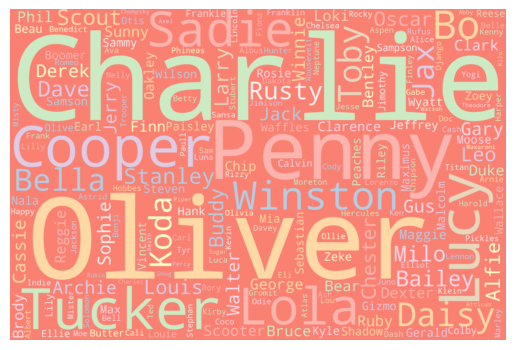

In [689]:
# Générer du text avec le nom des chiens
text = " ".join(name for name in list(all_data.name.dropna()))

# Générer un WordCloud sur le text précédent
word_cloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="salmon",
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
    max_font_size=1500,
    ).generate(text)

# sauvegrder l'image
word_cloud.to_file("img/Noms_de_chien_les_plus_populaires.png")

# Afficher le Word Cloud généré
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

* Le *Golden retriever* occupe la première place des races de chiens les plus fréquents sur les tweets.

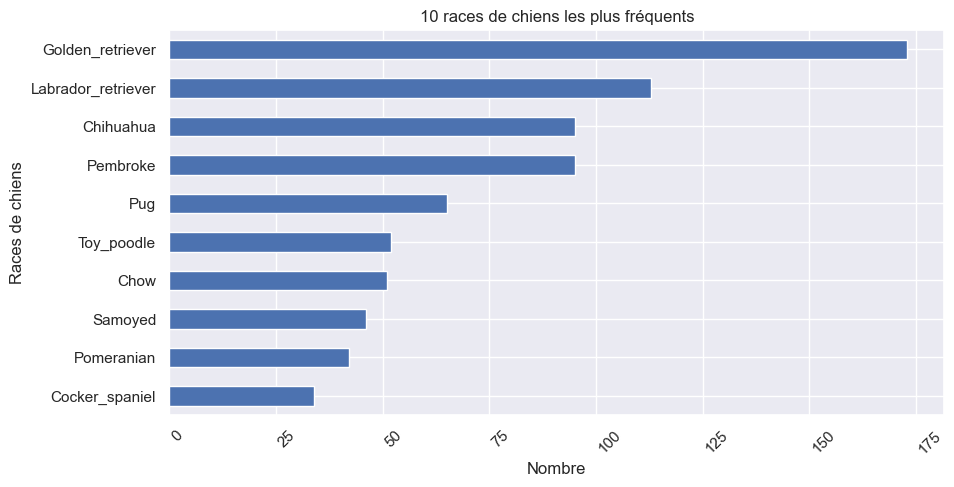

In [690]:
# filtrer le dataset
race_chien = all_data[all_data.race_chien.notna()]

# Graphe des dix races de chiens les plus fréquents
most_frequent = race_chien.race_chien.value_counts(ascending=True)[-10:]

plt.figure(figsize=(10, 5))
most_frequent.plot(kind='barh')
plt.title("10 races de chiens les plus fréquents")
plt.ylabel("Races de chiens")
plt.xlabel("Nombre")
plt.xticks(rotation=45, horizontalalignment='left');
plt.savefig("img/top_races_chiens")

* Les chiens les plus tweetés sont au niveau *pupper*.

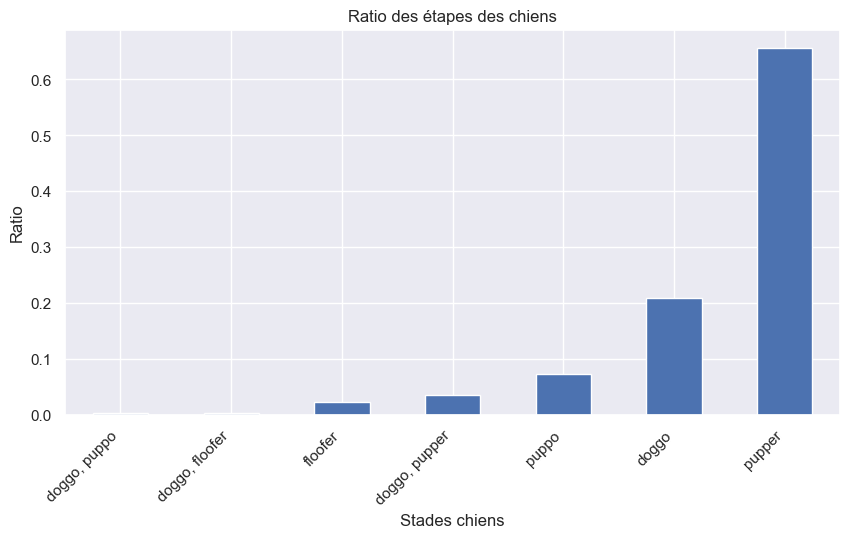

In [691]:
stades_chien = all_data[all_data.stade_chien.notna()]
stades_chien = stades_chien.stade_chien.value_counts(normalize=True, ascending=True)

plt.figure(figsize=(10, 5))
stades_chien.plot(kind='bar')
plt.title("Ratio des étapes des chiens")
plt.xlabel("Stades chiens")
plt.ylabel("Ratio")
plt.xticks(rotation=45, horizontalalignment='right');

* Le tweet le plus retweeté est celui de l'id *744234799360020481* à la date du *2016-06-18* et concerne un *Labrador_retriever*.
* *2016* est l'année où il y a eu le plus de Retweet (Rt).

In [692]:
# Tweet le plus retweeté 
all_data.loc[all_data.retweet_count.idxmax()]

tweet_id                                             744234799360020481
date                                          2016-06-18 18:26:18+00:00
source                                               Twitter for iPhone
text                  Here's a doggo realizing you can stand in a po...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                                NaN
stade_chien                                                       doggo
single_rate                                                         1.3
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/74423...
race_chien                                           Labrador_retriever
retweeted                                                         False
favorited                                                         False
favorite_count                                                  

[Text(0.5, 1.0, 'Retweets les plus élevés au fil des ans')]

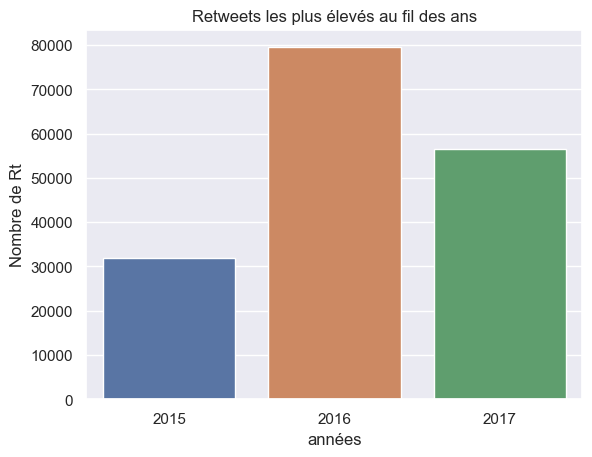

In [693]:
# Retweets sur l'année
highest_retweets = group_an.retweet_count.max()
df = pd.DataFrame(highest_retweets)
df.reset_index(inplace=True)
df.rename(columns={'retweet_count':'Nombre de Rt', 'date':'années'}, inplace=True)
sns.barplot(data=df, x="années", y="Nombre de Rt").set(title='Retweets les plus élevés au fil des ans')

Le nombre de Retweets (Rt) augmente au fil du temps chaque années, même si *2017* présente une certaine irrégularité.

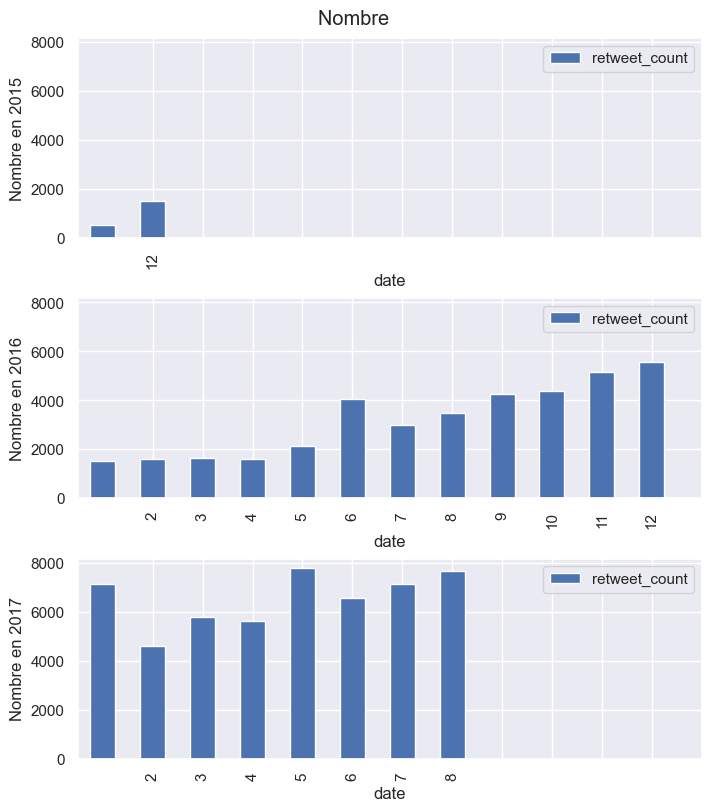

In [694]:
years_data = all_data.groupby([all_data.date.dt.year, all_data.date.dt.month]).agg({'retweet_count': 'mean'})

# Plotting
fig, axis = plt.subplots(nrows=3, ncols=1, figsize=(7, 8), constrained_layout=True, sharey=True)
years_data.xs(2015).plot(kind='bar', ax=axis[0])
years_data.xs(2016).plot(kind='bar', ax=axis[1])
years_data.xs(2017).plot(kind='bar', ax=axis[2])

axis[0].set_ylabel('Nombre en 2015')
axis[1].set_ylabel('Nombre en 2016')
axis[2].set_ylabel('Nombre en 2017')

plt.setp(axis, xticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]);
plt.suptitle("Nombre ");

* Chien le mieux aimé est celui illustré dans le tweet ayant pour id 822872901745569793 à la date du 2017-01-21. Il est de race *Lakeland Terrier*, de niveau *pupo* et ce présente sur cette [image](https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg).
* Voici ce qui a été dit dans ce fameux tweet : "*Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 .*". 
* Malheureusement on connait pas nom !

In [695]:
# Chien le mieux aimé
pd.DataFrame(all_data.loc[all_data.favorite_count.idxmax()])

,329
tweet_id,822872901745569793
date,2017-01-21 18:26:02+00:00
source,Twitter for iPhone
text,Here's a super supportive puppo participating ...
rating_numerator,13
rating_denominator,10
name,NaN
stade_chien,puppo
single_rate,1.3
jpg_url,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg


In [696]:
# Contenu du tweet
print("Contenu du tweet : ",all_data.loc[all_data.favorite_count.idxmax()].text)

Contenu du tweet :  Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 .


* Sur *2071* tweets où les langues ont été reconnues *2065* sont écrites en *Anglais*. Ce qui montre que montre que l'utilisateur du compte est soit originaire d'un pays anglophone soit il veut cibler plus de public avec ses tweets puisque l'anglais est la langue la plus parlé au monde.

In [697]:
tweet_lang = all_data[all_data.langue.notna()]
tweet_lang = tweet_lang.langue.value_counts(ascending=True)
pd.DataFrame(tweet_lang)

,langue
Basque,1
Roumain,1
Estonien,1
Néerlandais,3
Anglais,2065


#### Bonus (Word Cloud avec les Tweets)

In [698]:
# D'abord créer une liste avec tous les mots qui ont été tweetés dans notre DataFrame.
tweets = np.array(all_data.text)
my_list = []
for tweet in tweets:
    my_list.append(tweet.replace("\n",""))

In [699]:
# Ensuite télécharger une image d'une empreinte de patte sur Internet pour l'utiliser comme modèle de réprsentation
# des tweet avec wordcloud.
mask = np.array(Image.open(requests.get('https://clipartix.com/wp-content/uploads/2016/06/Dog-bone-pink-print-dog-paw-print-transparent-background-paw-print-pink-clipart.jpg', stream=True).raw))
text = my_list
def gen_wc(text, mask):
    word_cloud = WordCloud(width = 500, height = 500, background_color='white', mask=mask).generate(str(text))
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='red')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

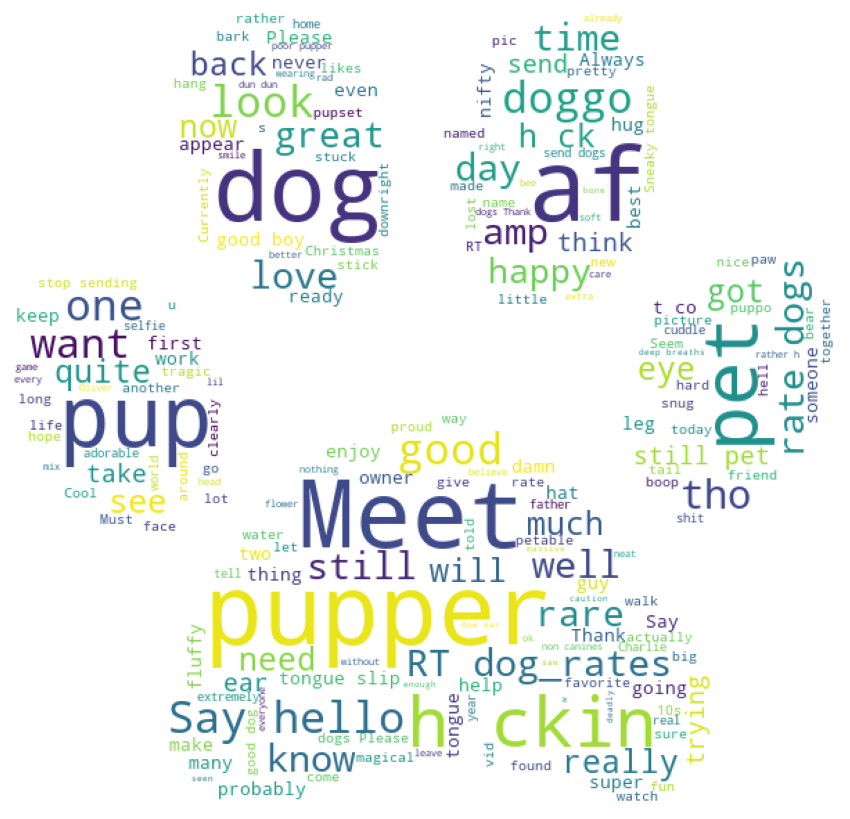

In [700]:
gen_wc(text, mask)